### Credit card defaulters

#### Problem Statement 

With the large increase in Credit Card applications, banks are finding it cumbersome to manually evaluate credit card applications. Using Data Science and Machine Learning algorithms predict whether an application can be accepted or rejected.

#### Five Cs of credit

The Five Cs of credit is a system used by lenders to gauge the creditworthiness of potential borrowers.
The Five Cs of credit are:
- character, 
- Capacity, 
- Capital, 
- Collateral, and 
- conditions

> The First C is Character - reflected by the applicant's credit history    
> The Second C is Capacity - the applicant's debt-to-income ratio     
> The Third C is Capital - the amount of money an applicant has     
> The Fourth C is Collateral - an asset that can back or act as security for the loan.   
> The Fifth C is conditions - the purpose of the loan, the amount involved, and preva;ing intrest rates.  

#### Data Set Exploration

The Data employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. The following 23 variables as explanatory variables:    

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.   
X2: Gender (1 = male; 2 = female).    
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).     
X4: Marital status (1 = married; 2 = single; 3 = others).    
X5: Age (year).    
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:     
X6 = the repayment status in September, 2005;      
X7 = the repayment status in August, 2005; . . .;     
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly;1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.    
X12-X17: Amount of bill statement (NT dollar).     
X12 = amount of bill statement in September, 2005;     
X13 = amount of bill statement in August, 2005; . . .;      
X17 = amount of bill statement in April, 2005.    
X18-X23: Amount of previous payment (NT dollar).      
X18 = amount paid in September, 2005;      
X19 = amount paid in August, 2005; . . .;      
X23 = amount paid in April, 2005.     

X1 LIMIT_BAL   
X2 SEX   
X3 EDUCATION    
X4 MARRIAGE   
X5 AGE   
X6 PAY_0   
X7 PAY_2   
X8 PAY_3   
X9 PAY_4  
X10 PAY_5    
X11 PAY_6    
X12 BILL_AMT1    
X13 BILL_AMT2   
X14 BILL_AMT3   
X15 BILL_AMT4    
X16 BILL_AMT5    
X17 BILL_AMT6    
X18 PAY_AMT1    
X19 PAY_AMT2   
X20 PAY_AMT3    
X21 PAY_AMT4    
X22 PAY_AMT5   
X23 PAY_AMT6    
Y default payment next month    

In [40]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df_credit_default = pd.read_excel('default_of_credit_card_clients.xls')

In [4]:
new_header = df_credit_default.iloc[0] #grab the first row for the header
df_credit_default = df_credit_default[1:] #take the data less the header row
df_credit_default.columns = new_header #set the header row as the df header

In [5]:
df_credit_default.head(5)

0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6  \
1  1     20000   2         2        1  24     2     2    -1    -1    -2    -2   
2  2    120000   2         2        2  26    -1     2     0     0     0     2   
3  3     90000   2         2        2  34     0     0     0     0     0     0   
4  4     50000   2         2        1  37     0     0     0     0     0     0   
5  5     50000   1         2        1  57    -1     0    -1     0     0     0   

0 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1  \
1      3913      3102       689         0         0         0        0   
2      2682      1725      2682      3272      3455      3261        0   
3     29239     14027     13559     14331     14948     15549     1518   
4     46990     48233     49291     28314     28959     29547     2000   
5      8617      5670     35835     20940     19146     19131     2000   

0 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
1      689        0        0        0        0                          1  
2     1000     1000     1000        0     2000                          1  
3     1500     1000     1000     1000     5000                          0  
4     2019     1200     1100     1069     1000                          0  
5    36681    10000     9000      689      679                          0

In [6]:
df_credit_default.shape

(30000, 25)

In [7]:
df_credit_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [8]:
df_credit_default.describe()

0          ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
count   30000      30000  30000      30000     30000  30000  30000  30000   
unique  30000         81      2          7         4     56     11     11   
top     30000      50000      2          2         2     29      0      0   
freq        1       3365  18112      14030     15964   1605  14737  15730   

0       PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
count   30000  30000  30000  30000      30000      30000      30000   
unique     11     11     10     10      22723      22346      22026   
top         0      0      0      0          0          0          0   
freq    15764  16455  16947  16286       2008       2506       2870   

0       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
count       30000      30000      30000     30000     30000     30000   
unique      21548      21010      20604      7943      7899      7518   
top             0          0          0         0         0         0   
freq         3195       3506       4020      5249      5396      5968   

0       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
count      30000     30000     30000                       30000  
unique      6937      6897      6939                           2  
top            0         0         0                           0  
freq        6408      6703      7173                       23364

In [9]:
#converting object typr to integer
df_credit_default = df_credit_default.apply(pd.to_numeric)

In [10]:
df_credit_default.describe()

0                ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

0               AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

0             PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

0          BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

0          PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

0           PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

We can see from above that we have multiple ranges values in our data frame. Some are ranging from -2-8 and some are ranging from 10000 - 1000000 which is very big difference we have to handle this, we can also see that count for all is 30000 which shows that we don't have any null values in the data set but we have check for any duplicate rows.
Other than this there are few invalid values in the data set which needs to be either imputed with correct values or dropped, such as:
- Education: this column shows that minimum value for this is 0 and max value is 6 where as allowed range is 1-4
- Marriage: Range allowed for this column is 1-3 where as it is having value between 0-3
- Payment History: PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6: having values -2 and 0 which is not allowed.

In [11]:
print('Total number of duplicate values in the data set is/are: {}'.format(df_credit_default.duplicated().sum()))

Total number of duplicate values in the data set is/are: 0


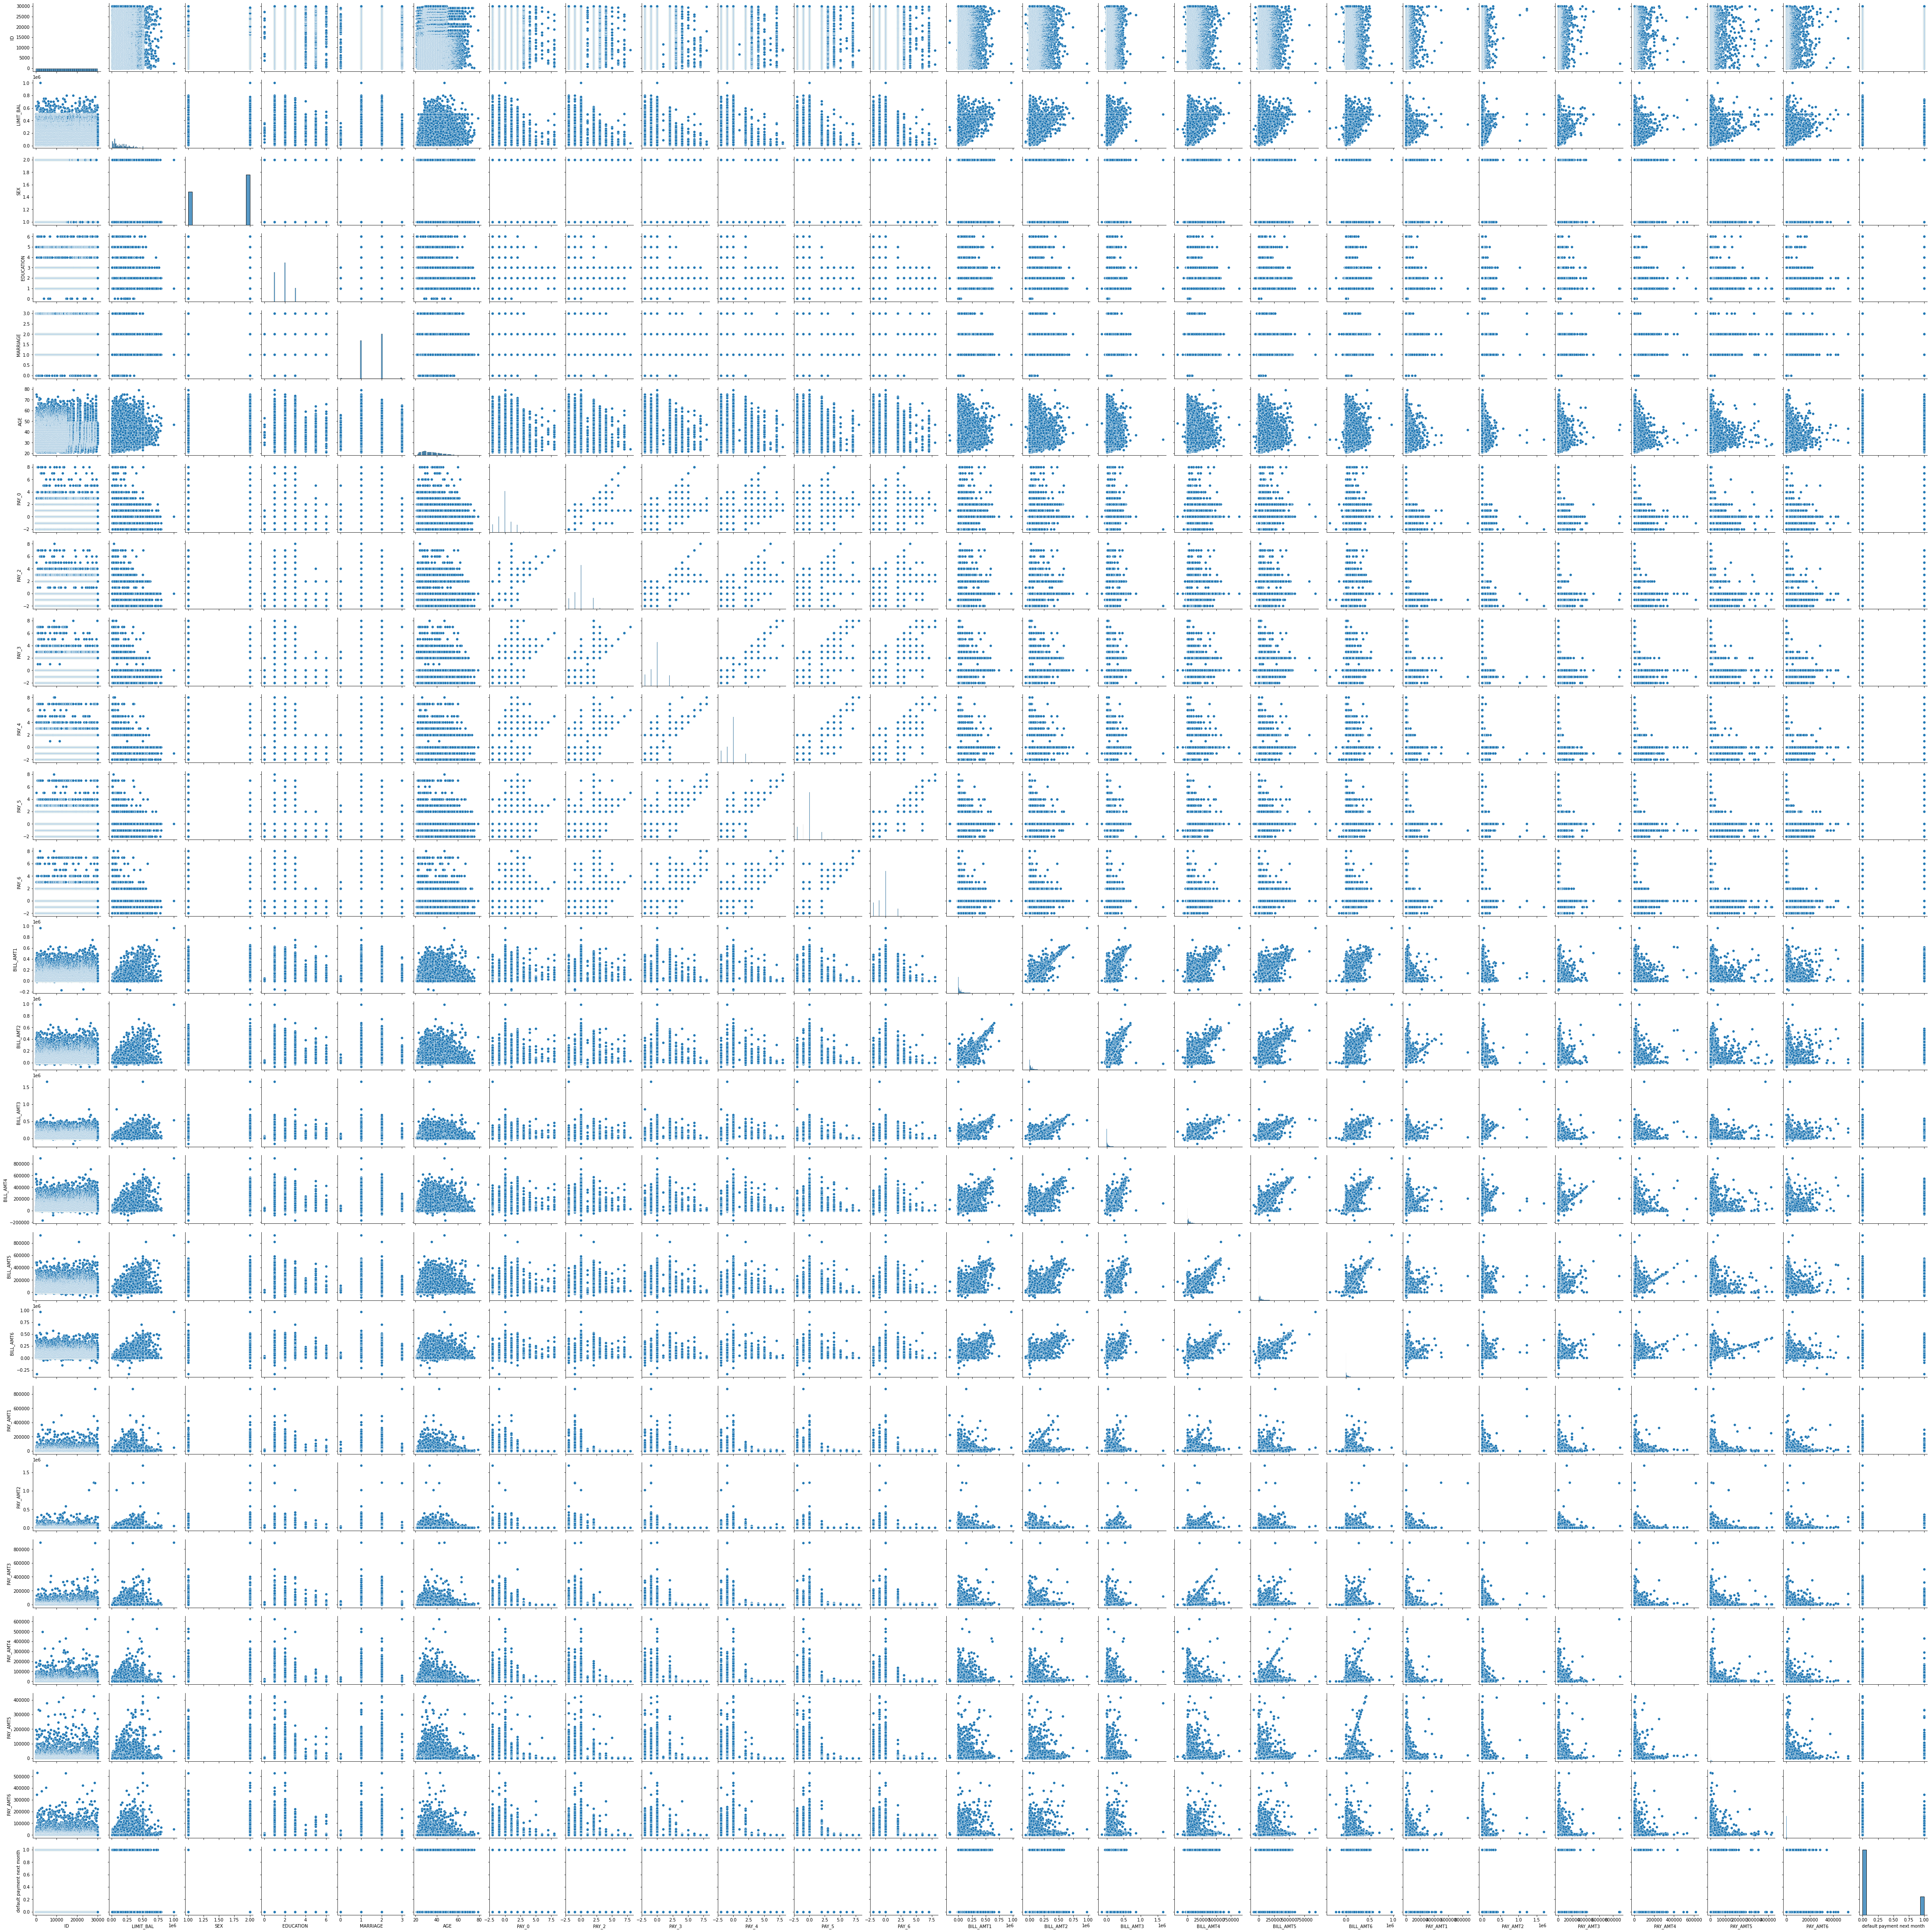

In [12]:
sns.pairplot(df_credit_default)

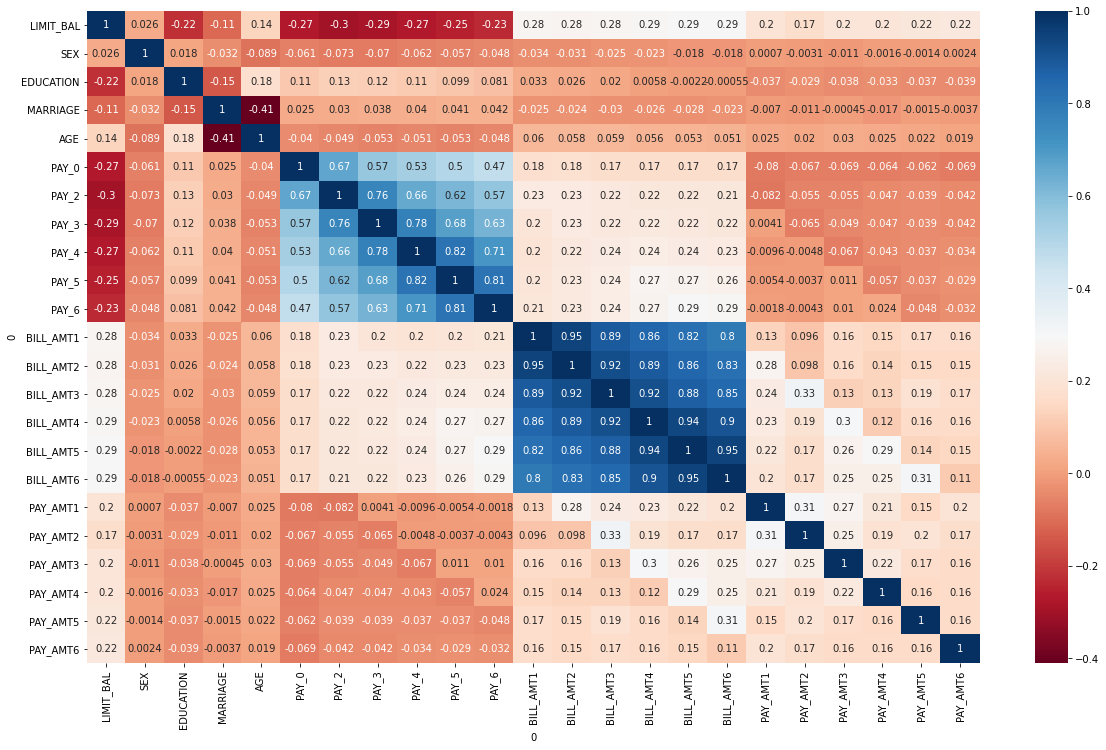

In [41]:
# Checking for multicollinearity

plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(),cmap='RdBu',annot=True);

In [13]:
# Checking correlation between the features
corr = df_credit_default.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

The correlation in the above map is quite eveident and this will not effect our model training so we will not perfom anything on the data set to reduce the correlation. we will use classification algorithm to predict the defaults, we will use randomforest classifier for this. 

#### Scaling due to difference in the range of the data set

We don't need any scaling in the data set since we are using random forest. Any tree based algorithm don't need any scaling, we are using randomforest also because their might me some outliers due to the big range of values in the column, RandomForest algorithm will handle that also.

#### Checking for imbalance in the data set

In [14]:
# Checking the balance in the data set
df_credit_default['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

From above we can see that their is imbalance in the data set and we have to perform over/under sampling to balance the data set.

E:\Maynooth\PythonAnaconda\envs\PythonCpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


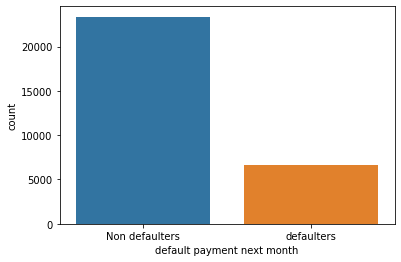

In [15]:
g = sns.countplot(df_credit_default['default payment next month'])
g.set_xticklabels(['Non defaulters','defaulters'])
plt.show()

#### Splitting The data set

In [16]:
X = df_credit_default.copy()
X.drop(['ID','default payment next month'],inplace = True, axis = 1)
y = df_credit_default.iloc[:,24].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify = y)

In [18]:
# imbalance in train set
Counter(y_train)

Counter({0: 16355, 1: 4645})

In [19]:
#imbalance in test set 
Counter(y_test)

Counter({0: 7009, 1: 1991})

In [20]:
# over = RandomOverSampler(sampling_strategy=0.3,random_state = 1)
# under = RandomUnderSampler(sampling_strategy=0.5, random_state = 1)
# over.fit_resample(X_train, y_train)
# under.fit_resample(X_train, y_train)

In [21]:
# # Instantiate MinMaxScaler and use it to rescale X_train and X_test
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX_train = scaler.fit_transform(X_train)
# rescaledX_test = scaler.fit_transform(X_test)
# logreg = LogisticRegression(max_iter = 3)

# # Fit model to the train set
# logreg.fit(X_train, y_train)

In [22]:
# y_pred = logreg.predict(rescaledX_test)

# print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# # Print the confusion matrix of the logreg model
# confusion_matrix(y_test, y_pred)

In [23]:
# # Checking the metric with trainset

# print('Accuracy of model with train set:', metrics.accuracy_score(y_train, y_pred_train))
# print('Precision of model with train set:', metrics.precision_score(y_train, y_pred_train))
# print('recall of model with train set:',metrics.recall_score(y_train, y_pred_train))
# print('F1 Score with train set:', metrics.f1_score(y_train, y_pred_train))
# print('F1 Score with train set:', metrics.roc_auc_score(y_train, y_pred_train))

In [24]:
# # Checking the accuracy of model with test set

# print('Accuracy of model with test set:', metrics.accuracy_score(y_test, y_pred))
# print('Precision of model with test set:', metrics.precision_score(y_test, y_pred))
# print('recall of model with test set:',metrics.recall_score(y_test, y_pred))
# print('F1 Score with test test:', metrics.f1_score(y_test, y_pred))
# print('F1 Score with test test:', metrics.roc_auc_score(y_test, y_pred))

#### Creating Pipeline for over/under sampling of data set and applying model to the data set

In [25]:
# Creating the data frame of scores from logistic regression

over = RandomOverSampler(sampling_strategy=0.3,random_state = 1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state = 1)
scaler = MinMaxScaler(feature_range=(0, 1))
steps = [('o', over), ('u', under),('s',scaler), ('m', LogisticRegression())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=['f1_micro','precision','recall'], cv=cv, n_jobs=-1)
pd.DataFrame(scores)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)                                    

fit_time  score_time  test_f1_micro  test_precision  test_recall
0   10.280418      0.0936       0.813333        0.611801     0.424569
1   10.420818      0.0312       0.812381        0.616667     0.398707
2   10.530019      0.0312       0.800952        0.579310     0.362069
3   10.311618      0.0936       0.819524        0.649123     0.398707
4    0.717601      0.0312       0.818571        0.639731     0.409483
5    0.873602      0.0468       0.830000        0.690141     0.421505
6    1.092002      0.0624       0.808571        0.600000     0.406452
7    1.185602      0.0468       0.801905        0.578778     0.387097
8    1.326002      0.1248       0.817143        0.631068     0.419355
9    1.794003      0.0624       0.822381        0.652318     0.423656
10   1.809603      0.0468       0.815238        0.621019     0.420259
11   1.123202      0.0468       0.806190        0.591054     0.398707
12   1.513203      0.0468       0.814762        0.624585     0.405172
13   1.326003      0.0468       0.817619        0.641115     0.396552
14   2.386804      0.0624       0.812857        0.623693     0.385776
15   1.107602      0.0468       0.818571        0.640940     0.410753
16   1.357203      0.0624       0.808571        0.603279     0.395699
17   1.310402      0.0468       0.816667        0.633333     0.408602
18   1.357203      0.0468       0.807143        0.600671     0.384946
19   2.246404      0.1560       0.828571        0.666667     0.451613
20   1.138802      0.0468       0.808571        0.607639     0.377155
21   1.263602      0.0468       0.818095        0.631410     0.424569
22   1.123202      0.0624       0.815238        0.619497     0.424569
23   1.263602      0.0468       0.825714        0.671329     0.413793
24   1.404002      0.0624       0.819048        0.644828     0.403017
25   1.263602      0.0468       0.800476        0.571875     0.393548
26   1.216802      0.0468       0.809524        0.604502     0.404301
27   1.294802      0.0468       0.819524        0.648276     0.404301
28   1.248002      0.0312       0.807619        0.596825     0.404301
29   1.107602      0.0468       0.818571        0.647887     0.395699

In [26]:
# creating a parameter grid for cross validation and hyper parameter tuning

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
param_grid = {'m__max_iter':[30,40],
              'm__penalty':['l1','l2','elasticnet'],
              'm__class_weight':[{0:1,1:4},{0:0.20,1:0.80},'balanced']
#               'm__solver':['lbfgs','saga','liblinear']
              
}
# rf = LogisticRegression(random_state = 1)
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, n_jobs = -1, verbose = 2)

In [27]:
# finding the best parameter from our cross validation
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 20 folds for each of 18 candidates, totalling 360 fits


E:\Maynooth\PythonAnaconda\envs\PythonCpu\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.38747619        nan        nan 0.38814286        nan
        nan 0.37792857        nan        nan 0.37783333        nan
        nan 0.694             nan        nan 0.6945            nan]
  category=UserWarning
E:\Maynooth\PythonAnaconda\envs\PythonCpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'m__class_weight': 'balanced', 'm__max_iter': 40, 'm__penalty': 'l2'}

In [28]:
# we are creating model out of the best grid generated by the cross validation
best_grid = grid_search.best_estimator_

In [29]:
# predicting the values using X_test data set
y_pred_lr = best_grid.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred_lr)

array([[4943, 2066],
       [ 716, 1275]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7009
           1       0.38      0.64      0.48      1991

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.76      0.69      0.71      9000



In [32]:
print('Accuracy of model with test set:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision of model with test set:', metrics.precision_score(y_test, y_pred_lr))
print('recall of model with test set:',metrics.recall_score(y_test, y_pred_lr))
print('F1 Score with train test:', metrics.f1_score(y_test, y_pred_lr))
print('ROC AUC Score with train test:', metrics.roc_auc_score(y_test, y_pred_lr))

Accuracy of model with test set: 0.6908888888888889
Precision of model with test set: 0.38162226878180183
recall of model with test set: 0.640381717729784
F1 Score with train test: 0.47824456114028496
ROC AUC Score with train test: 0.6728089213559749


#### Random Forest Algorithm

In [33]:
# creating a parameter grid for cross validation and hyper parameter tuning
param_grid_rf = {
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,150,250]
}
rf = RandomForestClassifier(random_state = 1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)

In [34]:
# finding the best parameter from our cross validation
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 80,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 250}

In [35]:
# we are creating model out of the best grid generated by the cross validation
best_grid_rf = grid_search.best_estimator_

In [36]:
# predicting the values using X_test data set
y_pred_rf = best_grid_rf.predict(X_test)

In [37]:
# Printing confusion matrix with random forest
confusion_matrix(y_test, y_pred_rf)

array([[4943, 2066],
       [ 716, 1275]], dtype=int64)

In [38]:
# Printing Classification report with random forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7009
           1       0.38      0.64      0.48      1991

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.76      0.69      0.71      9000



In [39]:
print('Accuracy of model with test set:', metrics.accuracy_score(y_test, y_pred_rf))
print('Precision of model with test set:', metrics.precision_score(y_test, y_pred_rf))
print('recall of model with test set:',metrics.recall_score(y_test, y_pred_rf))
print('F1 Score with train test:', metrics.f1_score(y_test, y_pred_rf))
print('F1 Score with train test:', metrics.roc_auc_score(y_test, y_pred_rf))

Accuracy of model with test set: 0.6908888888888889
Precision of model with test set: 0.38162226878180183
recall of model with test set: 0.640381717729784
F1 Score with train test: 0.47824456114028496
F1 Score with train test: 0.6728089213559749


#### Creating Model pickle 

In [42]:
# Saving model to disk
pickle.dump(best_grid, open('model.pkl', 'wb'))

In [47]:
# Testing our saved model

model = pickle.load(open('model.pkl','rb'))

data = {
    'LIMIT_BAL':[70000],
'SEX':[2],
'EDUCATION':[2],
'MARRIAGE':[2],
'AGE':[55],
'PAY_0':[0],
'PAY_2':[0],
'PAY_3':[0],
'PAY_4':[0],
'PAY_5':[0],
'PAY_6':[0],
'BILL_AMT1':[53214],
'BILL_AMT2':[54571],
'BILL_AMT3':[42413],
'BILL_AMT4':[42946],
'BILL_AMT5':[43843],
'BILL_AMT6':[44714],
'PAY_AMT1':[2230],
'PAY_AMT2':[2004],
'PAY_AMT3':[1537],
'PAY_AMT4':[1589],
'PAY_AMT5':[1589],
'PAY_AMT6':[1654]
}
df = pd.DataFrame(data)
prediction = model.predict(df)
output = round(prediction[0], 8)
print(output)

1


In [49]:
model.predict_proba(df)

array([[0.48366276, 0.51633724]])

In [54]:
model.predict(df)

array([1], dtype=int64)